In [1]:
import pandas as pd
#In order to display all the columns, bypass the pandas autodetect
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_predict
from sklearn import cross_validation
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.feature_selection import f_regression  


c:\program files (x86)\python36-32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
print(bos.head())
LSTAT = bos['LSTAT'].as_matrix() # pandas DataFrame into numpy array

PRICE=bos['PRICE'].as_matrix() # pandas DataFrame into numpy array


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [5]:
# Training & test set split

X_train1, X_test1, y_train1, y_test1 = train_test_split(LSTAT,PRICE,test_size=0.33,random_state=1)

# We need to sort the test sets based on the X values so that the regression line won't be disjointed in the regression plot

# Because we will not plot the training set, so no need to sort the training set.

# "numpy.argsort" here will sort the x-axis and y-axis together.

p = X_test1.argsort() # This will tell argsort to sort by using "X_test1" as the standard/norm

X_test1 = X_test1[p]

y_test1 = y_test1[p]  # Sort the y_test1 based on the x_test1 result

# Because sklearn LinearRegression/PolynomialFeatures only takes 2 dimensions array for X:  [n_samples, n_features],

# we need to reshape the numpy array

X_test1=X_test1.reshape(X_test1.shape[0], 1) 

y_test1=y_test1.reshape(y_test1.shape[0], 1) 

X_train1=X_train1.reshape(X_train1.shape[0], 1)

y_train1=y_train1.reshape(y_train1.shape[0], 1)


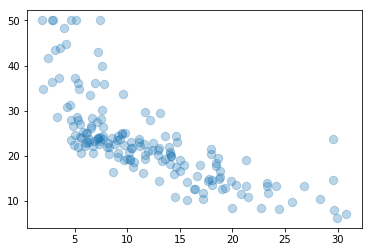

In [6]:
#Polynomial Regression-nst order

plt.scatter(X_test1, y_test1, s=70, alpha=0.3)

c:\program files (x86)\python36-32\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.7001419877511756e-17 / 1.1102230246251565e-16
  RuntimeWarning)
c:\program files (x86)\python36-32\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.0104774103939693e-17 / 1.1102230246251565e-16
  RuntimeWarning)
c:\program files (x86)\python36-32\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.028164113466646e-17 / 1.1102230246251565e-16
  RuntimeWarning)
c:\program files (x86)\python36-32\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-cond

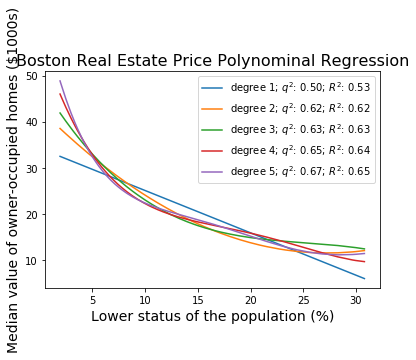

In [8]:
for degree in [1,2,3,4,5]:
    
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    
    scores = cross_validation.cross_val_score(model, X_train1,y_train1,cv=10)
    
    model.fit(X_train1,y_train1)
    
    y_plot = model.predict(X_test1)
    
    plt.plot(X_test1, y_plot, label="degree %d" % degree
             
             +'; $q^2$: %.2f' % scores.mean()
             
+'; $R^2$: %.2f' % model.score(X_test1, y_test1))
    plt.title("Boston Real Estate Price Polynominal Regression", fontsize='16')

plt.xlabel('Lower status of the population (%)', fontsize='14')

plt.ylabel('Median value of owner-occupied homes ($1000s)', fontsize='14')

plt.legend(loc='upper right')


In [9]:
#Mean Squared Error for First
mse = sklearn.metrics.mean_squared_error(X_test1[1], y_plot[1])
print(mse)

2157.6862043661467


In [10]:
#Mean Squared Error for Second
mse = sklearn.metrics.mean_squared_error(X_test1[2], y_plot[2])
print(mse)

1808.8899715093348


In [11]:
#Mean Squared Error for Third
mse = sklearn.metrics.mean_squared_error(X_test1[3], y_plot[3])
print(mse)

1568.2214034845722


In [12]:
#Mean Squared Error for Fourth
mse = sklearn.metrics.mean_squared_error(X_test1[4], y_plot[4])
print(mse)

1562.6572223000462


In [13]:
#Mean Squared Error for Fifth
mse = sklearn.metrics.mean_squared_error(X_test1[5], y_plot[5])
print(mse)

1518.8903980819246


In [14]:
#Best presdiction model is the fifth one because it hsa the least MSE and also the highest prediction value.